In [214]:
#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras

import dtreeviz.trees



In [215]:
#prepare data for model
df_s = pd.read_csv("daily.csv")

In [216]:
#define input and output
X = df_s.loc[:,['Precip (in)', 
                'Sol Rad (Ly/day)', 
                'Max Vap Pres (mBars)',
                'Avg Air Temp (F)',
                'Avg Rel Hum (%)',
                'Dew Point (F)',
                'Avg Wind Speed (mph)',
                'Avg Soil Temp (F)']]
y = df_s.loc[:,'ETo (in)']

X_train, X_test,Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [217]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8938, 8) (8938,) (2235, 8) (2235,)


In [218]:
#try to normalize by z score

#from scipy.stats import zscore

#create a sample df
#X_train_n = X
#X_test_n = X

#calculate the z scores and put in new column
#X_train_n['num_1_zscore'] = zscore(X_train_n['num_1'])
#X_test_n['num_1_zscore'] = zscore(X_test_n['num_1'])

#display(df)


In [219]:
#normalization via mean; standardize variable values

mean=X.mean()
std=X.std()
X_train_n=(X_train-mean)/std
X_test_n=(X_test-mean)/std


In [220]:
X_train_n.head()#show head and check if normalized

,Precip (in),Sol Rad (Ly/day),Max Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F)
3417,-0.1518,-1.027264,-1.334204,-1.194944,-0.069794,-1.343565,-0.354025,-1.430119
960,-0.1518,0.683710,0.649863,0.834645,-0.287754,0.918087,-0.138324,0.597394
10415,-0.1518,-0.820172,3.439344,1.486118,0.257146,2.251041,-0.893276,1.320165
7841,-0.1518,-1.194909,-0.351993,-1.295171,1.673887,-0.229128,-1.001127,-1.251773
1937,-0.1518,1.127478,1.199902,0.784531,0.202656,1.289566,-0.246174,1.235685


Random Forest (RF)

In [221]:
#adapted from course github code
params_rf = {'n_estimators': 1000, #number of trees = 100
              'criterion':'mse', #criterion is mse
              #'ccp_alpha':0.001,
              'max_depth': 5, #number of levels in each tree = 5
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True, #set bootstrap as true
              'max_features':None} #no max feature

#set hyperparameters

In [222]:
model1 = RandomForestRegressor(**params_rf) #define model as rfr

In [223]:
%%time
model1.fit(X_train_n, Y_train) #display model time

/Users/qinhuang/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 15.6 s, sys: 144 ms, total: 15.7 s
Wall time: 15.9 s


RandomForestRegressor(criterion='mse', max_depth=5, max_features=None,
                      n_estimators=1000)

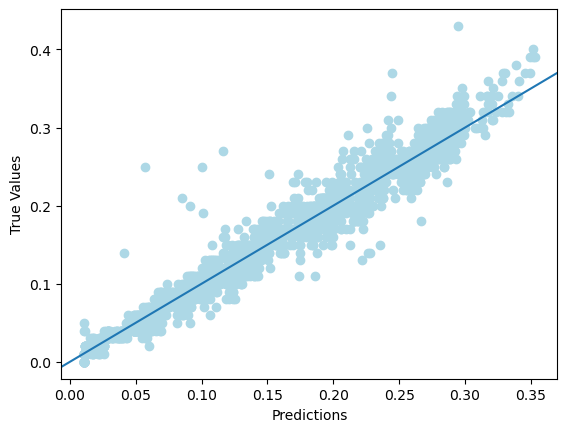

In [224]:
y_hat = model1.predict(X_test_n) #yhat is y prediction

plt.scatter(y_hat, Y_test, color = 'lightblue') #define x and y axis; choose color
plt.xlabel('Predictions') #x axis title
plt.ylabel('True Values') #y axis title
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-1,1],[-1,1]) #set range


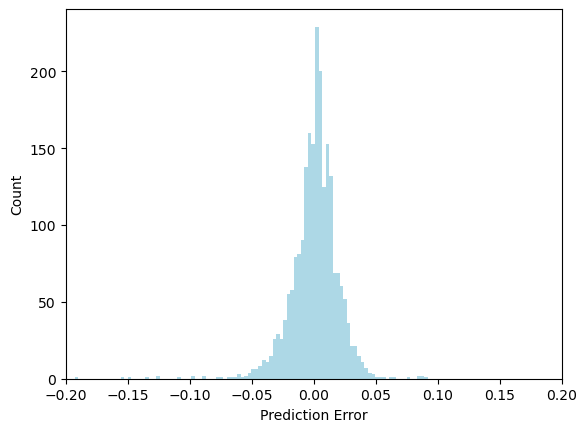

In [225]:
#histogram
error = y_hat - Y_test
plt.hist(error, bins = 100, color = 'lightblue')
plt.xlim(-0.2, 0.2)
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [262]:
#MSE
MSE = mse(Y_test, y_hat)
print(f'the MSE of RFR model is {MSE}')

the MSE of RFR model is 0.0003865676931256587


In [263]:
#RMSE
RMSE = np.sqrt(MSE)
print(f'the RMSE of RFR model is {RMSE}')

the RMSE of RFR model is 0.019661324805965105


In [264]:
#MAE
MAE = mae(Y_test, y_hat)
print(f'the MAE of RFR model is {MAE}')

the MAE of RFR model is 0.013537302535362465


In [265]:
#R2
R2 = r2_score(Y_test, y_hat)
print(f'the R2 score of RFR model is {R2}')

the R2 score of RFR model is 0.9544042827568663


In [267]:
#training performance
format(model1.score(X_train_n, Y_train))

'0.9599555369084516'

In [268]:
#testing performance
format(model1.score(X_test_n, Y_test))

'0.9544042827568663'

XGBoost

In [228]:
model2 = XGBRegressor(**params_xgb) #use xgb for modeling

In [229]:
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     #median of validation set
              'n_estimators': 100,  #number of trees
              #'learning_rate': 0.01, 
              'max_depth': 5,       #number of levels in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 0,
              'reg_lambda': 1,}

In [230]:
#tree_viz1 = dtreeviz.trees.dtreeviz(model2, X_train_n,Y_train, 
#                                    target_name='ETo', 
#                                    feature_names= X_train_n.columns,class_names=['Precip (in)', 
#                'Sol Rad (Ly/day)', 
#                'Max Vap Pres (mBars)',
#                'Avg Air Temp (F)',
#                'Avg Rel Hum (%)',
#                'Dew Point (F)',
#                'Avg Wind Speed (mph)',
#                'Avg Soil Temp (F)'])


In [231]:
%%time
model2.fit(X_train_n, Y_train)

/Users/qinhuang/opt/anaconda3/envs/keras/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 2.36 s, sys: 373 ms, total: 2.73 s
Wall time: 436 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

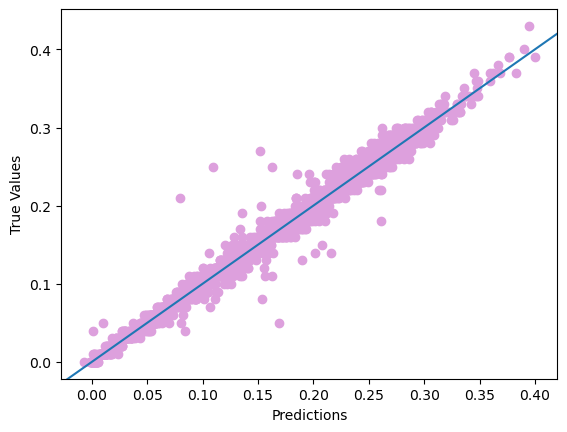

In [232]:
#plot for model2
y_hat2 = model2.predict(X_test_n) 

plt.scatter(y_hat2, Y_test, color = 'plum')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])


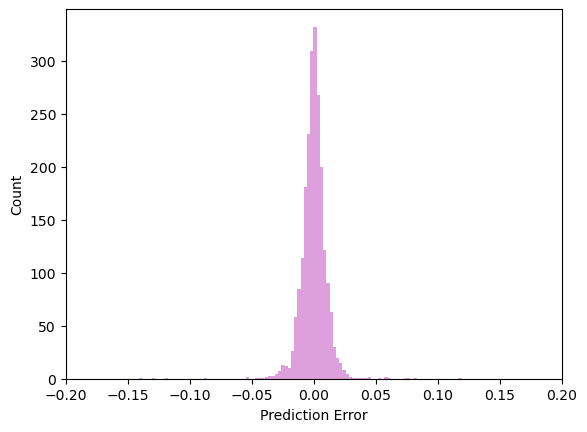

In [233]:
#histogram for model2
error = y_hat2 - Y_test
plt.xlim(-0.2, 0.2)
plt.hist(error, bins = 100, color = 'plum')
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [234]:
#MSE
MSE2 = mse(Y_test, y_hat2)
print(f'the MSE of XGB model is {MSE2}')

the MSE of XGB model is 0.00013195583611372815


In [235]:
#RMSE
RMSE2 = np.sqrt(MSE2)
print(f'the RMSE of XGB model is {RMSE2}')

the RMSE of XGB model is 0.01148720314583703


In [236]:
#MAE
MAE2 = mae(Y_test, y_hat2)
print(f'the MAE of XGB model is {MAE2}')

the MAE of XGB model is 0.007138049581641995


In [237]:
#R2
R2_2 = r2_score(Y_test, y_hat2)
print(f'the R2 score of XGB model is {R2_2}')

the R2 score of XGB model is 0.9844357893869132


In [238]:
#training performance
format(model2.score(X_train_n, Y_train))


'0.9945858008908309'

In [239]:
#testing performance
format(model2.score(X_test_n, Y_test))

'0.9844357893869132'

In [240]:
#this code is from https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
def plot_feature_importance(importance, names): #define function

    feature_importance = np.array(importance)#create arrays from feature importance 
    feature_names = np.array(names)#create arrays from feature names

    data={'feature_names':feature_names,
          'feature_importance':feature_importance}#create a dataframe using a Dictionary
    df_ip = pd.DataFrame(data) #define df
    df_ip.sort_values(by=['feature_importance'], #sort df values
                      ascending=False, #descending
                      inplace=True)

    plt.figure(figsize=(10,8))#set figure size
    
    sns.barplot(x=df_ip['feature_importance'], #searborn bar chart
                y=df_ip['feature_names'], 
                palette='Set2', #choose color
               )

    plt.title('Feature Importance')#figure title
    plt.xlabel('Importance')#x title
    plt.ylabel('Features')#y title
    
    

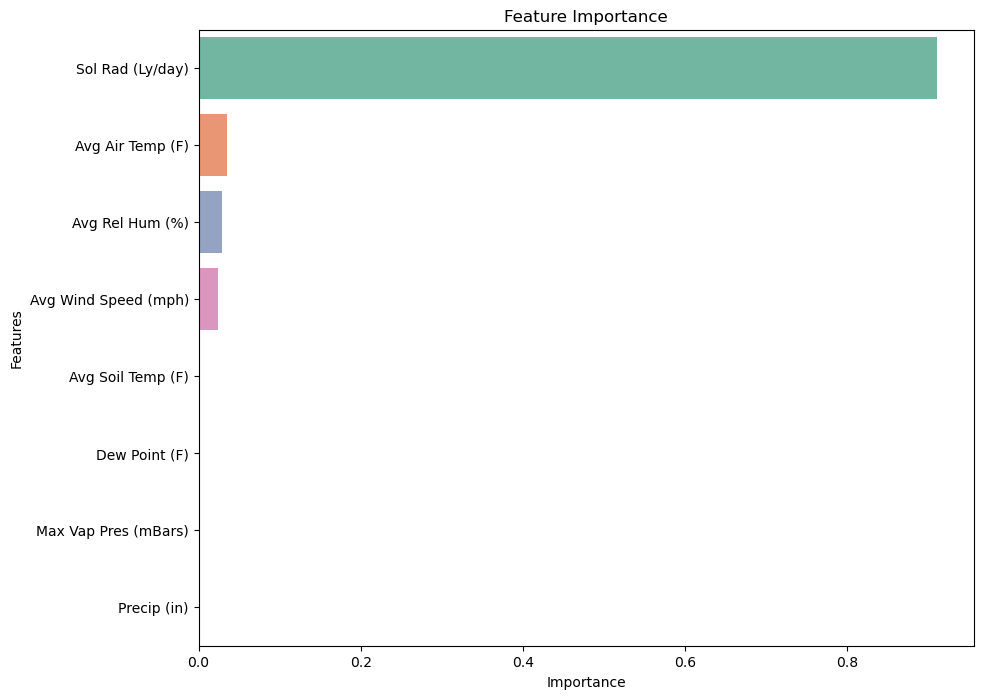

In [241]:
#plot feature importance for model 1
plot_feature_importance(model1.feature_importances_, X.columns)


In [242]:
#import dtreeviz.trees

In [243]:
# let's create a dictionary of features and their importance values
#feat_dict= {}
#for col, val in sorted(zip(X_train_n.columns, df_ip.feature_importances_),key=lambda x:x[1],reverse=True):
#  feat_dict[col]=val

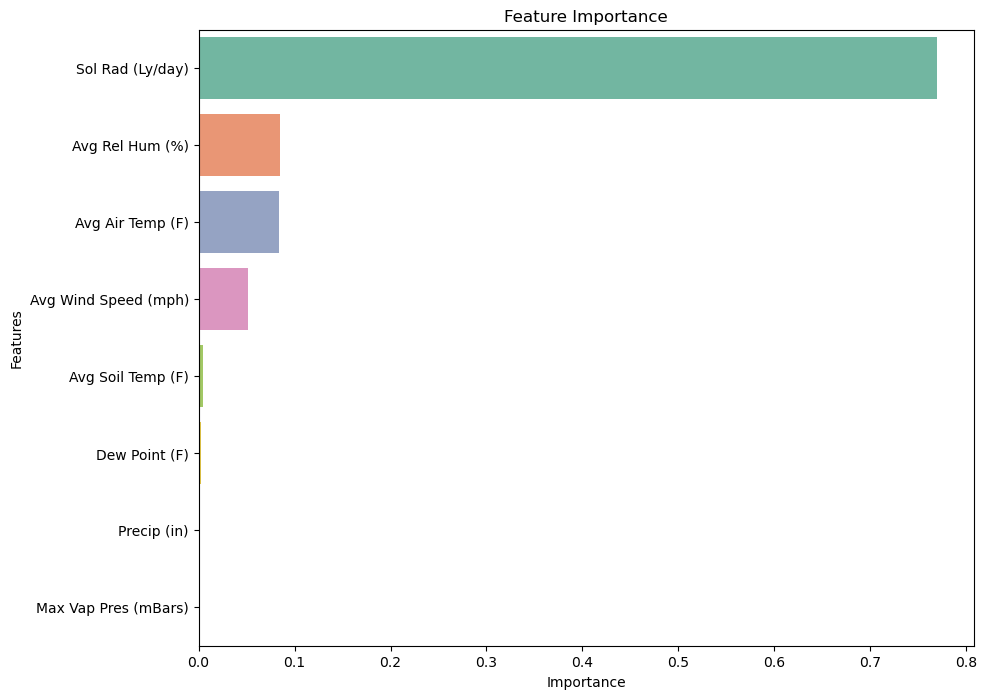

In [244]:
#plot feature importance for model 2
plot_feature_importance(model2.feature_importances_, X.columns)

Neural Network

In [250]:
model3 = keras.Sequential([
    keras.layers.Dense(4, #number of neurons
#                       activation=tf.nn.sigmoid, #choose activation function
                       activation=tf.nn.relu, 
                       input_shape=(X_train_n.shape[1],),#set input shape
                       name='hidden_layer_1',),
    keras.layers.Dense(32, #number of neurons
#                       activation=tf.nn.sigmoid,
                       activation=tf.nn.relu,
                       name='hidden_layer_2',),
#    keras.layers.Dense(4, activation=tf.nn.relu,
#                       name='hidden_layer_3',),
    #keras.layers.Dense(32, activation=tf.nn.relu,
    #                   name='hidden_layer_4',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   input_shape=(16,),
    #                   name='hidden_layer_2',),
    keras.layers.Dense(1, name='output_layer',
                       activation=tf.nn.relu)
])

In [251]:
optimizer = tf.keras.optimizers.Adam()#define what optimizer to use

model3.compile(loss='mse', #set loss
               optimizer=optimizer,#optimizer
               metrics=['mse']) #set metrics

model3.summary()#plot summary table

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 4)                 36        
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                160       
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [252]:
class PrintDot(keras.callbacks.Callback):#show training progress and print a single dot for each completed epoch
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
def plot_history(history): #use plot_histroy to plot the training process;
    #determine how long to train before the model stops making progress
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Validation loss')
    plt.legend()
    plt.xlim([0, 100])

In [253]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=60)#apply early stopping to prevent overfitting
#set patience; the amount of epochs to check for improvement
#Store training stats
history = model3.fit(X_train_n, Y_train, 
                     epochs=1000,#number of epochs
                     validation_split=0.2, #valiation set
                     verbose=0,
                     callbacks=[early_stop]#apply early stop
                    )

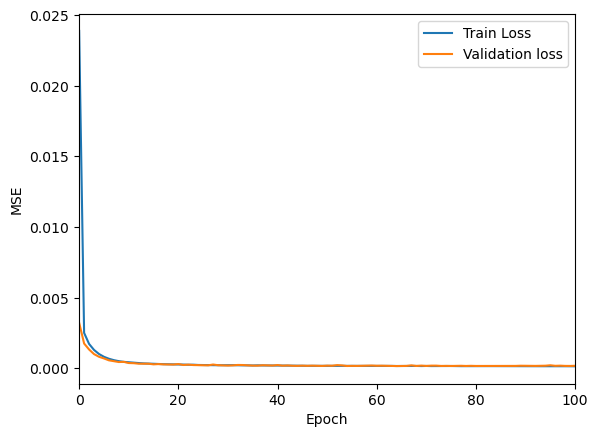

In [254]:
plot_history(history)

70/70 [==============================] - 0s 644us/step


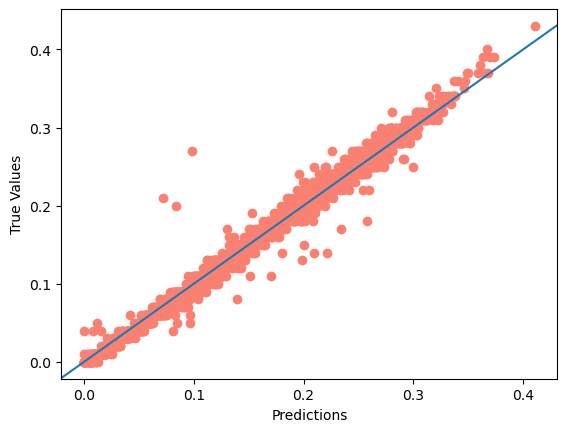

In [255]:
y_hat3 = model3.predict(X_test_n)

plt.scatter(y_hat3, Y_test, color = 'salmon')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-1,1],[-1,1])

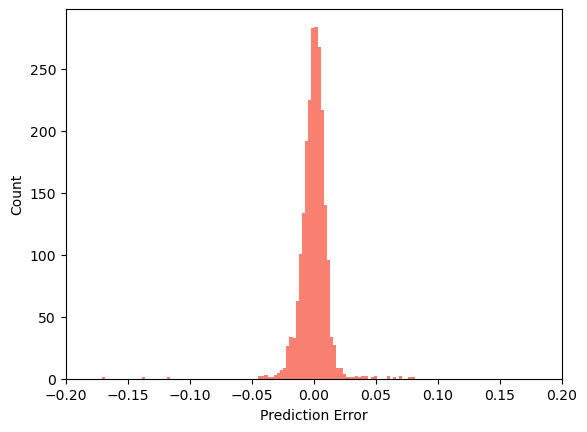

In [256]:
error = y_hat3.reshape(2235,) - Y_test
plt.xlim(-0.2, 0.2)
plt.hist(error, bins = 100, color = 'salmon')
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [257]:
#MSE
MSE3 = mse(Y_test, y_hat3)
print(f'the MSE of NN model is {MSE3}')

the MSE of NN model is 0.00012686913518023912


In [258]:
#RMSE
RMSE3 = np.sqrt(MSE3)
print(f'the RMSE of NN model is {RMSE3}')

the RMSE of NN model is 0.011263619985610271


In [259]:
#MAE
MAE3 = mae(Y_test, y_hat3)
print(f'the MAE of NN model is {MAE3}')

the MAE of NN model is 0.007192050589211035


In [260]:
#R2
R2_3 = r2_score(Y_test, y_hat3)
print(f'the R2 score of NN model is {R2_3}')

the R2 score of NN model is 0.9850357665230998


Compare 3 models

In [261]:
print('RFR:', 
      'MSE =', {MSE}, 
      'RMSE =', {RMSE}, 
      'MAE =', {MAE}, 
      'R2 =', {R2})

print('XGB:', 
      'MSE =', {MSE2}, 
      'RMSE =', {RMSE2}, 
      'MAE =', {MAE2}, 
      'R2 =', {R2_2})

print('NN:', 
      'MSE =', {MSE3}, 
      'RMSE =', {RMSE3}, 
      'MAE =', {MAE3}, 
      'R2 =', {R2_3})

NameError: name 'MAE' is not defined

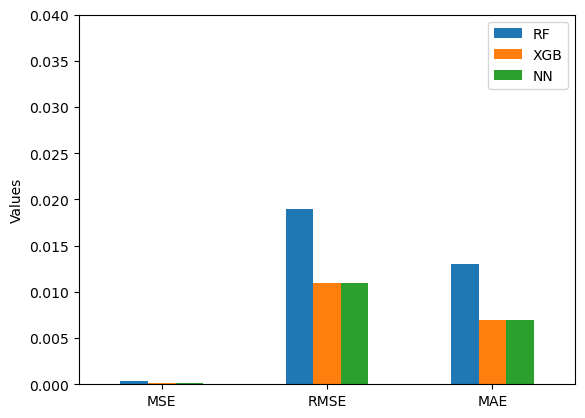

In [271]:
#with r2
#RFR = [0.0001279735189816607, 0.011312538131721842, 0.007112620686826242, 0.9849055042884821]
#XGB = [0.00014483913560460143, 0.012034913194726476, 0.007518301217566752, 0.9829162022843421]
#NN = [0.0008559194052936644, 0.029256100309058015, 0.024653428163587784, 0.8990441780813921]

#index = ['MSE', 'RMSE', 'MAE','R2']

#without r2
RF = [0.00038, 0.019, 0.013]
XGB = [0.00013, 0.011, 0.007]
NN = [0.00012, 0.011, 0.007]

index = ['MSE', 'RMSE', 'MAE']

dfp = pd.DataFrame({'RF': RF,
                   'XGB': XGB,
                   'NN': NN}, 
                   index=index)

ax = dfp.plot.bar(rot=0
#                  color = ''
                 )

#for p in ax.patches:
#    ax.annotate(str(p.get_height()), 
#                (p.get_x() * 0.97, 
#                 p.get_height() * 1.01))

plt.ylim(0, 0.04)
plt.ylabel("Values")

plt.show()

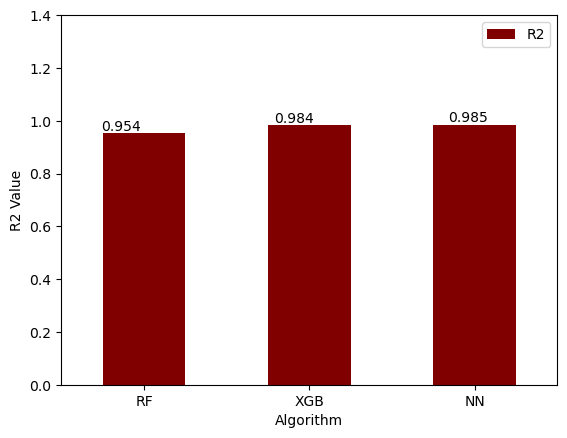

In [270]:
#compare R2

dfo = pd.DataFrame({'Algorithm':['RF', 'XGB', 'NN'], 
                    'R2':[0.954, 
                          0.984, 
                          0.985]})

ax = dfo.plot.bar(x='Algorithm', 
                  y='R2', 
                  rot=0,
                  color = 'maroon')

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() * 1.05, 
                 p.get_height() * 1.01))

plt.ylim(0, 1.4)
plt.ylabel("R2 Value")
plt.show()